In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sys
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#Collect Stabbing incidents in nyc prisons data
!curl https://data.cityofnewyork.us/api/views/hve5-8z68/rows.csv?accessType=DOWNLOAD > inmate_stabbing.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   114    0   114    0     0    647      0 --:--:-- --:--:-- --:--:--   647


In [3]:
#Collect number of incarcerated prisoners in nyc data
!curl https://data.cityofnewyork.us/api/views/26ze-s5bx/rows.csv?accessType=DOWNLOAD > inmates.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   140    0   140    0     0   1166      0 --:--:-- --:--:-- --:--:--  1166


In [4]:
#Move the data to PUIDATA
!mv inmate_stabbing.csv $PUIDATA
!mv inmates.csv $PUIDATA

In [5]:
#Read in the incident stabbing data. Remove the last row due to NANs
inmate_stabbing = pd.read_csv(os.getenv("PUIDATA") + '/inmate_stabbing.csv')
incidents = inmate_stabbing.drop(inmate_stabbing.index[len(inmate_stabbing)-1])
incidents.tail()

,Fiscal Year,Number of Incidents
5,2005.0,30.0
6,2004.0,40.0
7,2003.0,40.0
8,2002.0,29.0
9,2001.0,54.0


In [6]:
#Read in the prisoner population data
noinmates = pd.read_csv(os.getenv("PUIDATA") + '/inmates.csv')
noinmates.tail()

,Fiscal year,Inmate Population
5,2005,13576
6,2004,13751
7,2003,14533
8,2002,13934
9,2001,14490


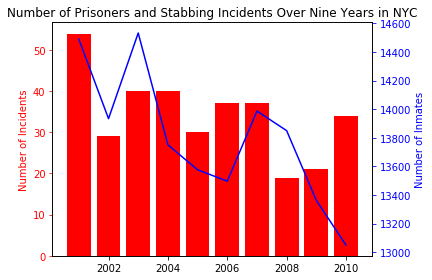

In [13]:
#Create a two y-axes line graph using the the two data sets

fig, ax1 = plt.subplots()
x = noinmates['Fiscal year']
y1 = incidents['Number of Incidents']
ax1.bar(x, y2, color = 'r')
ax1.set_ylabel('Number of Incidents', color='r')
ax1.tick_params('y', colors='r')

ax2 = ax1.twinx()
y2 = noinmates['Inmate Population']
ax2.plot(x, y2, color = 'b')
ax2.set_xlabel('Years')
# Make the y-axis label, ticks and tick labels match the line color.
ax2.set_ylabel('Number of Inmates', color='b')
ax2.tick_params('y', colors='b')
ax2.set_title('Number of Prisoners and Stabbing Incidents Over Nine Years in NYC')


fig.tight_layout()
plt.show()